## Ejercicios capitulo 1 Shumway

### * Luis Pavón*

In [1]:
import rdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA

from math import sqrt
import matplotlib
from random import random

C:\Users\pavo_\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


### Ejercicio 1

In [2]:
parsed = rdata.parser.parse_file('EQ5.rda')
converted = rdata.conversion.convert(parsed)
EQ5=pd.DataFrame(converted)
parsed = rdata.parser.parse_file('EXP6.rda')
converted = rdata.conversion.convert(parsed)
EXP6=pd.DataFrame(converted)


In [3]:
EQ5=pd.DataFrame(converted)

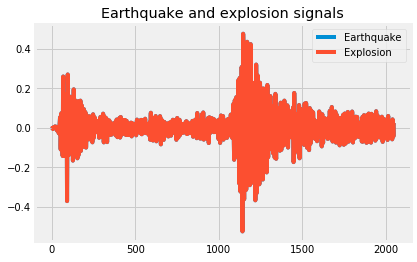

In [4]:
plt.plot(EQ5)
plt.plot(EXP6)
plt.title('Earthquake and explosion signals')
plt.legend(['Earthquake','Explosion'])
plt.show()

### Ejericio 2

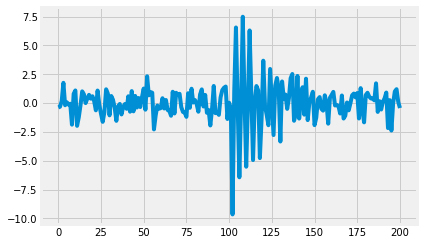

In [5]:
#x_t=s_t+w_t
pi=np.pi
x=[]
s_t=0
for t in range(0,201):
    if t<101: 
        s_t=0
    else:
        s_t=10*np.exp(-(t-100)/20)*np.cos(2*pi*t/4)
    w_t=np.random.randn()
    x.append(s_t+w_t)
plt.plot(x)
plt.show()

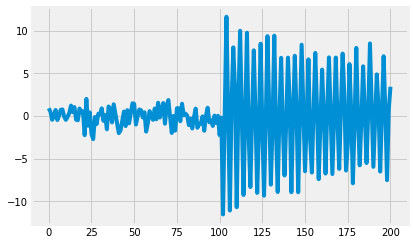

In [6]:
#x_t=s_t+w_t
pi=np.pi
x=[]
s_t=0
for t in range(0,201):
    if t<101: 
        s_t=0
    else:
        s_t=10*np.exp(-(t-100)/200)*np.cos(2*pi*t/4)
    w_t=np.random.randn()
    x.append(s_t+w_t)
plt.plot(x)
plt.show()

### Ejericicio 3

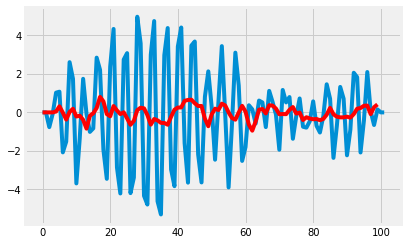

In [7]:
w = np.random.randn(100)

#Generamos las realizaciones del vector autoregresivo
x = np.zeros(102)
x[0] = 0
x[1] = 0
for i in range(2,len(w)):
    x[i]= -0.9 * x[i-2]+ w[i]

filtro = np.zeros(100)
filtro[0] = 0
filtro[1] = 0
filtro[2] = 0
filtro[3] = 0
for i in range(4,len(filtro)):
    filtro[i] = 0.25*(x[i]+x[i-1]+x[i-2]+x[i-3])
    
#Graficamos los resultados
plt.plot(x)
plt.plot(filtro, 'r-',)
plt.show()

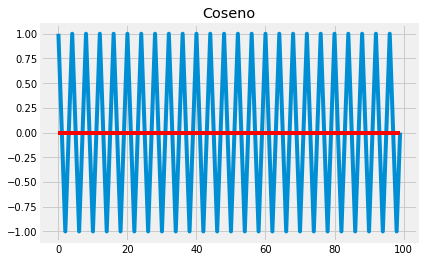

In [8]:
#Generamos las realizaciones del vector autoregresivo
x = np.zeros(100)
for t in range(len(x)):
    x[t]=np.cos((2*pi*t)/4)

filtro = np.zeros(100)
filtro[0] = 0
filtro[1] = 0
filtro[2] = 0
filtro[3] = 0
for i in range(4,len(filtro)):
    filtro[i] = 0.25*(x[i]+x[i-1]+x[i-2]+x[i-3])
    
#Graficamos los resultados
plt.plot(x)
plt.plot(filtro, 'r-')
plt.title('Coseno')
plt.show()

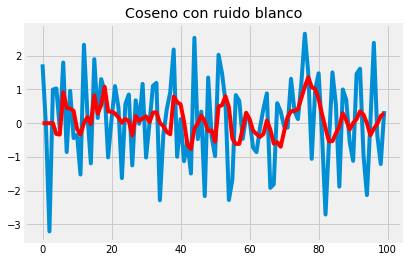

In [9]:
#Generamos las realizaciones del vector autoregresivo
w = np.random.randn(100)
x = np.zeros(100)
for t in range(len(x)):
    x[t]=np.cos((2*pi*t)/4)+w[t]

filtro = np.zeros(100)
filtro[0] = 0
filtro[1] = 0
filtro[2] = 0
filtro[3] = 0
for i in range(4,len(filtro)):
    filtro[i] = 0.25*(x[i]+x[i-1]+x[i-2]+x[i-3])
    
#Graficamos los resultados
plt.plot(x)
plt.plot(filtro, 'r-',)
plt.title('Coseno con ruido blanco')
plt.show()

### Ejercico 4

$$ P.D  \ \ \gamma (s,t) = E[(X_t - \mu_t)(X_s - \mu _s)] = E[X_t X_s]-\mu_t \mu_s $$


$$ E[(X_t - \mu_t)(X_s - \mu _s)] = E[(X_t X_s - \mu_t X_s - \mu_s X_t - \mu _s \mu_t] =  E[X_t X_s] - E[\mu_t X_s] - E[\mu_s X_t] -E[ \mu _s \mu_t]   $$

$$ =E[X_t X_s] - \mu_t E[ X_s] - \mu_s E[X_t] -\mu _s \mu_t = E[X_t X_s] - \mu_t \mu_s - \mu_s \mu_t -\mu _s \mu_t   $$

$$E[X_t X_s] - 2\mu_t \mu_s + \mu_t \mu_s =E[X_t X_s] -\mu_t \mu_s $$

### Ejercicio 5

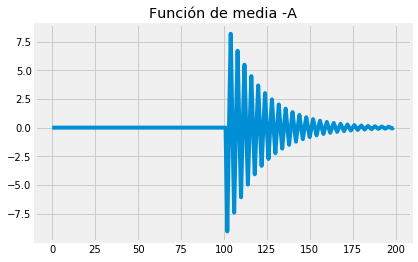

In [10]:
#A)    
#Funciónn media

m_a=np.zeros(200)
for t in range(len(m_a)):
    if t<101:
        m_t=0
    else:
        m_t=10*np.exp(-(t-100)/20)*np.cos(2*pi*t/4)
    m_a[t]=m_t
plt.plot(m_a)
plt.title('Función de media -A')
plt.show()

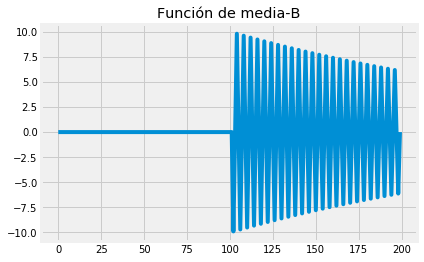

In [11]:
#B)

#Funciónn media

m_a=np.zeros(200)
for t in range(len(m_a)):
    if t<101:
        m_t=0
    else:
        m_t=10*np.exp(-(t-100)/200)*np.cos(2*pi*t/4)
    m_a[t]=m_t
plt.plot(m_a)
plt.title('Función de media-B')
plt.show()

Así la función de autocovarianza $\gamma_X$ es:

$\gamma_X (t,s)  = Cov(X_t,x_s)= E[X_t X_s] - E[X_t]E[X_s] $


Sabemos que $ E[X_t]=0$, entonces


$ \gamma_X (t,s)=E[X_t X_ s]= E[(10 \exp{-(t-100/20)} \cos {2\pi t4} + w_t)(10 \exp{-(s-100/20)} \cos {2\pi s4} + w_s)] = E[(10 \exp{-(t-100/20)} \cos {2\pi t4})(10 \exp{-s-100/20)} \cos {2\pi s4}]+E[w_t(10 \exp{-(s-100/20)} \cos {2\pi s4})+E[w_s(10 \exp{-(t-100/20)} \cos {2\pi t4})+ E[w_t w_s] $

$=(10 \exp{-(t-100/20)} \cos {2\pi t4})(10 \exp{-s-100/20)} \cos {2\pi s4}+1$

$=(100 \exp{((s-t)+200/20)} \cos {2\pi t4}\cos {2\pi s4})+1= 100\exp{((s-t)+200/20)}(2 (\cos(\frac{2\pi t4+2\pi s4}{2})+ \cos(\frac{2\pi t4-2\pi s4}{2})+1 = 1+200\exp{((s-t)+200/20)}((\cos(8\pi (t+s))+ \cos(8\pi (t-s))$

Sea $h =t-s$   Entonces:


$\gamma_X (t,s)=1+200\exp{((h)+200/20)}((\cos(8\pi (-h))+ \cos(8\pi (h))$



Analogamente para el inciso b

$\gamma_X (t,s)=1+200\exp{((h)+1)}((\cos(8\pi (-h))+ \cos(8\pi (h))$

### Ejercicio 7

Determina la función de autocorrelación y autocovarianza de:


Sea:  $$  X_t = w_{t-1}+ 2w_t + w_{t+1}$$

Así, tenemos:



$ \gamma_{(t,s)}= E[X_t X_s]-E[X_t]E[X_s] = E[(w_{t-1}+ 2w_t + w_{t+1})(w_{s-1}+ 2w_s + w_{s+1})]$

Sea $h= t-s$


Caso 1: $h=0, i.e.  t=s$

$\gamma_{(t,t)}=E[(w_{t-1}+ 2w_t + w_{t+1})(w_{t-1}+ 2w_t + w_{t+1})]=E[(w_{t-1}+ 2w_t + w_{t+1})^2]= Var(X_t) $

ya que $E[X_t]=0$

Entonces:

$ Var(X_t) = E[(w_{t-1}+ 2w_t + w_{t+1})^2]=E[w_{t-1}(w_{t-1}+ 2w_t + w_{t+1})+2w_t(w_{t-1}+ 2w_t + w_{t+1})+w_{t+1}(w_{t-1}+ 2w_t + w_{t+1}) = \sigma^2+4\sigma^2+\sigma^2= 6\sigma^2$

Caso 2: $h=1, i.e. |t-s|=1$


$\gamma_{(t,t+1)}=COV(w_{t-1}+ 2w_t + w_{t+1},w_{t}+ 2w_{t+1} + w_{t+2})= 2\sigma^2 + 2\sigma^2 = 4\sigma^2  $

Caso 3: $h=2, i.e. |t-s|=2$


$\gamma_{(t,t+2)}=COV(w_{t-1}+ 2w_t + w_{t+1},w_{t+1}+ 2w_{t+2} + w_{t+3})= \sigma^2 $


O.c. $h>2, i.e. |t-s|>2 $


$\gamma_{(t,t+h)}=0$


Entonces:



$\gamma_{(t,t+h)}=  \left\{\begin{array}{rl}  \sigma^2+4\sigma^2+\sigma^2= 6\sigma^2 & \text{si } h= 0 \\   4\sigma^2   & \text{si } h  =1 \\   \sigma^2   & \text{si } h  =2  \\   0   & \text{si } h  >2 \end{array} \right. $


Ahora para la fucnión de autocorrelación, tenemos que:

$\rho_x=\frac{\gamma_x}{\gamma_0}= \frac{\gamma_x}{Var(X_t)}=\frac{\gamma_x}{6\sigma^2} = \left\{\begin{array}{rl}  1 & \text{si } h= 0 \\ \frac{4}{6} & \text{si } h  =1 \\  \frac{1}{6}   & \text{si } h  =2  \\   0   & \text{si } h  >2 \end{array} \right.$



### Ejercicio 9

Sea  $$ X_t= u_1\sin(2\pi w_0t)+u_2\cos(2\pi w_0t)$$


Demuestra que es un proceso estacionario.

$ E[X_t]= E[u_1\sin(2\pi w_0t)+u_2\cos(2\pi w_0t)]= E[u_1\sin(2\pi w_0t)]+E[u_2\cos(2\pi w_0t)]=E[u_1]\sin(2\pi w_0t)+E[u_2]\cos(2\pi w_0t)=0$


$\gamma_x (t,s)=Cov(u_1\sin(2\pi w_0t)+u_2\cos(2\pi w_0t),u_1\sin(2\pi w_0s)+u_2\cos(2\pi w_0s))=E[(u_1\sin(2\pi w_0t)+u_2\cos(2\pi w_0t))(u_1\sin(2\pi w_0s)+u_2\cos(2\pi w_0s))]-E[X_t]E[X_s]$

$=E[U_1^2 \sin(2\pi w_0t)\sin(2\pi w_0s)+U_1 U_2 \sin(2\pi w_0t)\cos(2\pi w_0s)+U_1 U_2 \sin(2\pi w_0s)\cos(2\pi w_0t)+U_2^2 \cos(2\pi w_0t)\cos(2\pi w_0s)]$

$=E[U_1^2 \sin(2\pi w_0t)\sin(2\pi w_0s)]+E[U_1 U_2 \sin(2\pi w_0t)\cos(2\pi w_0s)]+E[U_1 U_2 \sin(2\pi w_0s)\cos(2\pi w_0t)]+E[U_2^2 \cos(2\pi w_0t)\cos(2\pi w_0s)]$

$=E[U_1^2] \sin(2\pi w_0t)\sin(2\pi w_0s)+E[U_2^2 ]\cos(2\pi w_0t)\cos(2\pi w_0s)=\sigma^2 \sin(2\pi w_0t)\sin(2\pi w_0s)+\sigma^2 \cos(2\pi w_0t)\cos(2\pi w_0s)$

$=\sigma^2(\sin(2\pi w_0t)\sin(2\pi w_0s) + \cos(2\pi w_0t)\cos(2\pi w_0s))$

con $h=t-s$ tenemos:


$\gamma_x (t,s)= \sigma^2 \cos(2\pi w_0h)$

Por lo tanto $X_t$ es débilmente estacionario.

### Ejercicio 20

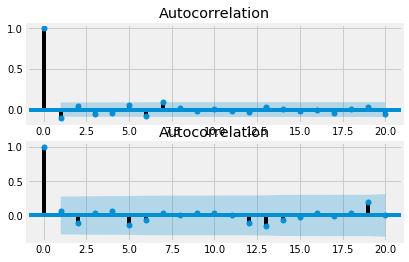

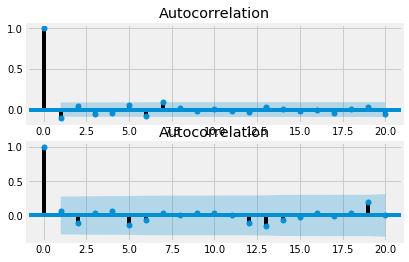

In [12]:
w = np.random.randn(500)
w_2 = np.random.randn(50)


from statsmodels.graphics.tsaplots import plot_acf

pyplot.figure(1)
pyplot.subplot(211)
plot_acf(w, ax=pyplot.gca(), lags = 20)
pyplot.subplot(212)
plot_acf(w_2, ax=pyplot.gca(), lags = 20)




### Ejericio 21

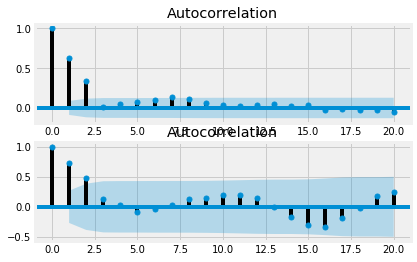

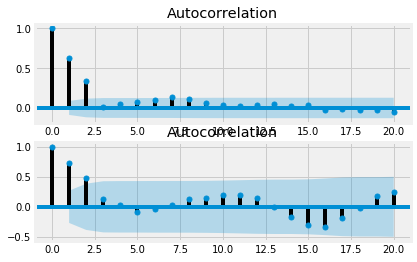

In [13]:
x = np.random.randn(503)
x_2=np.random.randn(53)
ma = np.zeros(503)
ma[0] = 0
ma[1] = 0
ma[2] = 0

for i in range(3,len(ma)-1):
    ma[i] = (1/3)*(x[i]+x[i-1]+x[i+1])

ma_2 = np.zeros(53)
ma_2[0] = 0
ma_2[1] = 0
ma_2[2] = 0

for i in range(3,len(ma_2)):
    ma_2[i] = (1/3)*(x[i]+x[i-1]+x[i+1])


pyplot.figure(1)
pyplot.subplot(211)
plot_acf(ma, ax=pyplot.gca(), lags = 20)
pyplot.subplot(212)
plot_acf(ma_2, ax=pyplot.gca(), lags = 20)

### Ejercicio 23

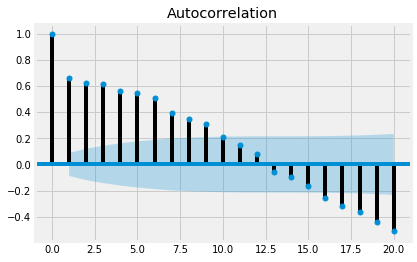

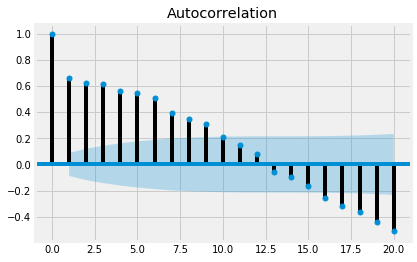

In [14]:
w = np.random.randn(500)

x=np.zeros(500)

for t in range(len(x)):
    x[t]=2*np.cos(2*pi*(t+15)/50)+w[t]

plot_acf(x, ax=pyplot.gca(), lags = 20)